In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
class LinearRegression:

    def __init__(self, eta=0.10, epochs=50, is_verbose=False):

        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose

    def predict(self, x):

        ones = np.ones((x.shape[0], 1))
        x_1 = np.append(x.copy(), ones, axis=1)
        return self.get_activation(x_1)

    def get_activation(self, x):
        activation = np.dot(x, self.w)
        return activation

    def fit(self, X, y):

        self.list_of_errors = []

        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)

        self.w = np.random.rand(X_1.shape[1])

        for e in range(self.epochs):

            error = 0

            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w

            error = np.square(y - activation).sum()/2.0
            self.list_of_errors.append(error)

            if (self.is_verbose):
                print("Epoch: {}, weights: {}, number of errors: {}".format(e, self.w, error))


In [6]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data = pd.read_csv("../data/housing.data", sep=' +', names=cols, engine='python')

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
data['LSTAT'].dropna(inplace=True)
data['MEDV'].dropna(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [18]:
X = data['LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values

In [19]:
sc = StandardScaler()

In [20]:
sc.fit(X)
X_std = sc.transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
lr = LinearRegression(0.00001, 10000)

In [50]:
lr.fit(X_train, y_train)

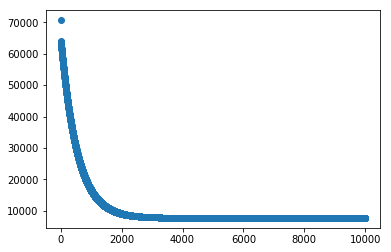

In [51]:
plt.scatter(range(lr.epochs), lr.list_of_errors)

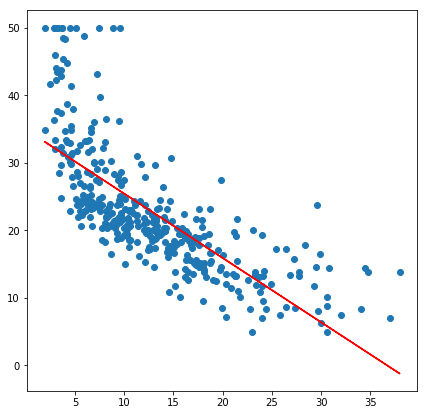

In [55]:
plt.figure(figsize=(7, 7))
plt.scatter(X_train, y_train)
plt.plot(X_train,lr.predict(X_train), color='red')

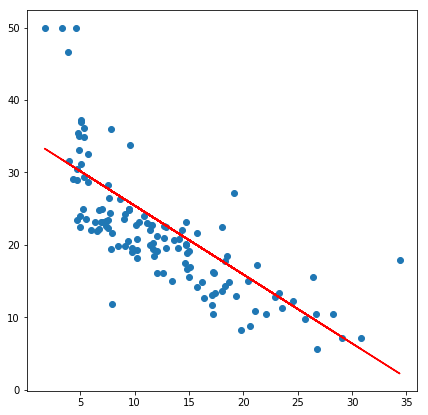

In [56]:
plt.figure(figsize=(7, 7))
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color='red')

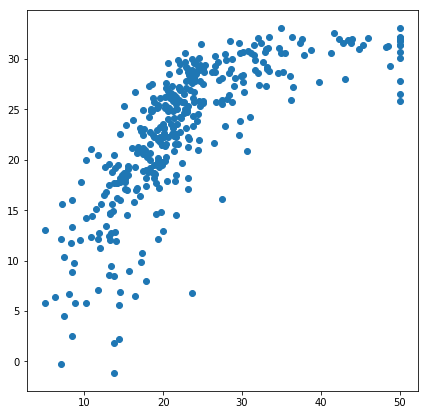

In [59]:
plt.figure(figsize=(7,7))
plt.scatter(y_train, lr.predict(X_train))

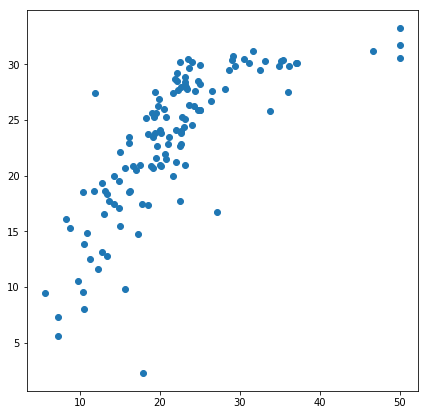

In [58]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, lr.predict(X_test))